In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
train = pd.read_csv('./train-parking.csv')
train.head()

,Street,From,To,Date,Time,Real.Spots,Street.Length,any_spot
0,Mission Street,25th Street,26th Street,1/7/2014,16:19,4,179.132970,1
1,Polk Street,Ellis Street,Olive Street,1/18/2014,20:42,0,52.740210,0
2,Van Ness Avenue,Geary Boulevard,Myrtle Street,1/18/2014,20:39,0,52.517840,0
3,Van Ness Avenue,Bush Street,Fern Street,1/18/2014,20:38,0,52.405315,0
4,Van Ness Avenue,Daniel Burnham Court,Post Street,1/18/2014,20:38,0,52.191193,0


In [5]:
train.shape

(1100, 8)

#### Distribution of training data over time

In [13]:
date_dist = pd.DataFrame(train.groupby('Date').size()).reset_index()
date_dist.columns = ['Date','Count']
date_dist.head()

,Date,Count
0,1/18/2014,10
1,1/19/2014,1
2,1/20/2014,10
3,1/21/2014,13
4,1/23/2014,8


In [27]:
date_dist.Date.min(), date_dist.Date.max()

('1/18/2014', '3/9/2014')

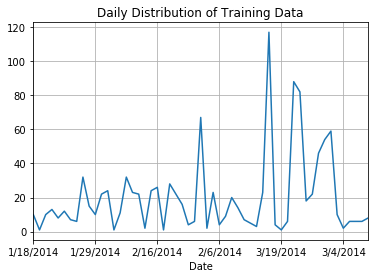

In [34]:
date_dist.plot('Date', 'Count', 
               legend=False, grid=True, 
               title='Daily Distribution of Training Data')

In [69]:
train['Hour'] = train.Time.map(lambda x: int(x.split(':')[0]))
hour_dist = pd.DataFrame(train.groupby(['Hour', 'any_spot']).size()).unstack().reset_index()
hour_dist.columns = ['Hour','no_spot','has_spot']
hour_dist.index = hour_dist.Hour
hour_dist.head()

,Hour,no_spot,has_spot
Hour,,,
7,7,40,23
8,8,23,13
9,9,30,28
10,10,26,6
11,11,24,7


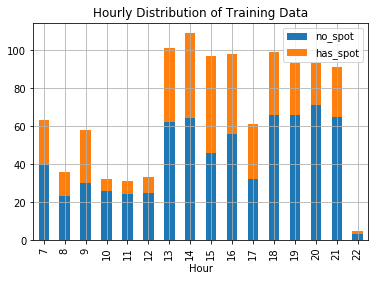

In [73]:
hour_dist.drop('Hour',axis=1).plot(stacked=True, grid=True, kind='bar',
               title='Hourly Distribution of Training Data')

In [58]:
street_dist = pd.DataFrame(train.groupby(['Street', 'any_spot']).size()).unstack().reset_index()
street_dist.columns = ['Street','no_spot','has_spot']
street_dist.index = street_dist.Street
street_dist.head()

,Street,no_spot,has_spot
Street,,,
23rd Street,23rd Street,36.0,40.0
Battery Street,Battery Street,12.0,4.0
Bryant Street,Bryant Street,3.0,15.0
Bush Street,Bush Street,13.0,10.0
Columbus Avenue,Columbus Avenue,5.0,1.0


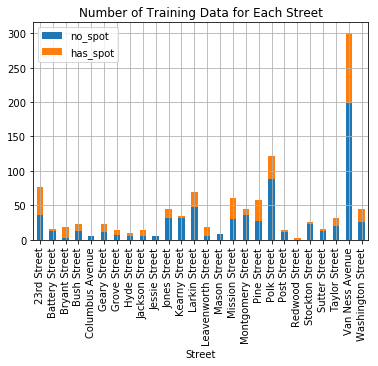

In [59]:
street_dist.plot(stacked=True, grid=True, kind='bar',
               title='Number of Training Data for Each Street')